# Lab 5 - Exploratory Data Analysis

In [1]:
% matplotlib inline

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. Follow the general directions in this Module for *methodical* EDA including:

1. Single Variable Exploration.
2. Correlation or Problem driven Exploration of Pairwise Relationships.

Because we don't really have a problem or question here, we may have to be exhaustive. There are 21 comparisons possible, start with any 5 of them and then use what you discover to add 5 more.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. The emphasis here is on *science*. At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

In EDA, you should generally never just *change* anything. You should copy your code, explain why you're making some change to the parameters, make the change and then note what happens.

Be inventive and creative.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

# Answer

The file `insurance.csv` contains data about insurance charges as well as some basic demographic (age, sex, US region) and lifestyle (BMI, smoker) data. The variables are:

* [age](#age)
* [sex](#sex)
* [bmi](#bmi)
* [children](#children)
* [smoker](#smoker)
* [region](#region)
* [charges](#charges)

The question or problem is to determine if charges has any relationship with the other values. This exploratory data analysis is just the first step. We will first look at the patterns in each individual variable and then look to see if there are any patterns between charges and any of the other variables.

We start by loading the data.

In [3]:
insurance = pd.read_csv( "insurance.csv", header=0)

We'll look at the overall characteristics of the data to make sure it loaded correctly. First, let's get the basic data frame info:

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


There are 1338 records (or observations) for each variable so there are no missing values. there are 4 numerical variables and what appears to be 3 categorical variables. Let's look at the first few rows:

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are two interesting things here. First, the BMI is measured with great precision (3 decimal places). The same is true of charges as well which seems "off". The precision looks to measure one 10,000-th of a cent.

<a id="age"></a>

## Age

Age is a numeric variable. We expect that the data will be distributed about the same as the US population although it should stop fairly abruptly around 65 years old when Medicare becomes available.

Let's first look at the summary statistics for Age to get a sense for the range actually covered and if there are any anomalies (0 or negative ages, 300 year olds).

In [6]:
insurance.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The minimum age is 18, which makes sense, and as we expected, the maximum age is 64. Age is numerical so we can do a histogram.

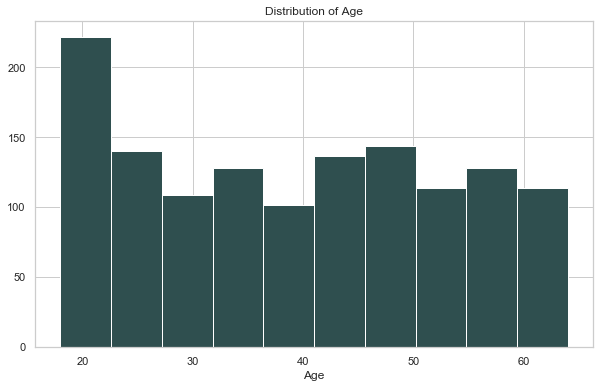

In [7]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.age, color="darkslategray")
axes.set_title("Distribution of Age")
axes.set_xlabel("Age")

plt.show()
plt.close()

There are two things that jump out. First, there are a lot of records for people around 20 years of age and, second, the distribution for the other ages is relatively uniform.

How does this match the US population as a whole?

According to data for 2000 from [CensusScope](http://www.censusscope.org/us/chart_age.html) it is somewhat expected for the US overall population more or less uniformly distributed at least until 55 years of age.

![Population Pyramid](http://www.censusscope.org/us/chart_age_graph_1.gif)

## Sex

<a id="sex">Sex</a> is a categorical variable. We would expect the distribution to be 50/50, more or less, because it covers the entire age range. If the data were more about senior citizens, for example, we'd expect there to be more women than men.

In [8]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

There are almost exactly the same number of men and women in the data.

<a id="bmi"></a>
## BMI

BMI is one indicator of overall health. According to Wikipedia, [BMI](https://en.wikipedia.org/wiki/Body_mass_index) is calculated as:

$$\frac{mass}{height^2}$$

in $kg$/$m^2$. Despite the "square" term, it seems possible that BMI is normally distributed. Let's look at the summary statistics:

In [9]:
insurance.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

The minimum BMI is 15.96 and the maximum is 53.13 so there are definitely *extremes* in the data but the main concentration of data indicates that the data may be normally distributed. The mean is 30.7 and the median is nearly that at 30.4. The first quartile is 26.3 and the third quartile is 34.7, both about equidistant from the median/mean.

Let's plot the data using a histogram:

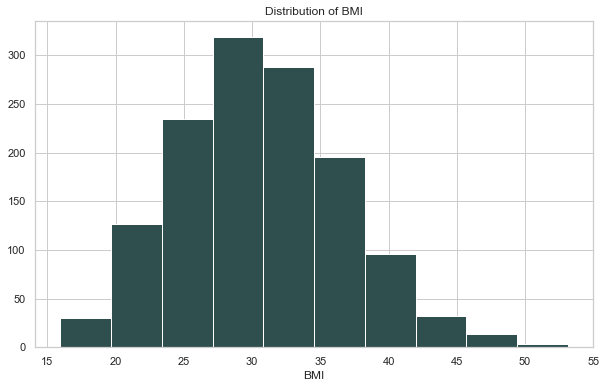

In [10]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.bmi, color="darkslategray")
axes.set_title("Distribution of BMI")
axes.set_xlabel("BMI")

plt.show()
plt.close()

The data looks only slightly skewed right which makes some sense. There is lower bounds on both weight and height for most North American populations but not nearly the kind of upper bound on, at least, weight. Let's see if a better binning can clean up the resolution of the histogram.

There aren't so many values that we couldn't just use a bin size of 1. Let's first look at the rawest resolution of the data:

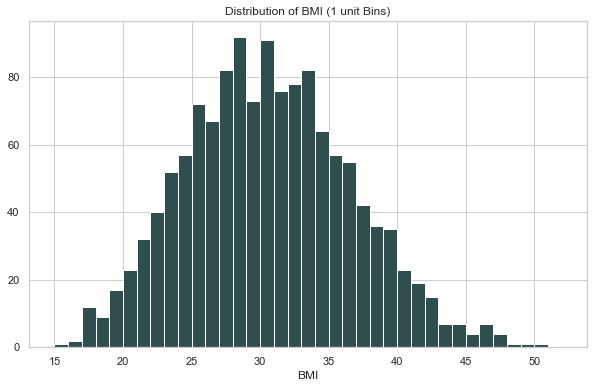

In [11]:
mn = int(insurance.bmi.min())
mx = int(insurance.bmi.max())
bins = [i for i in range(mn, mx, 1)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.bmi,bins=bins, color="darkslategray")
axes.set_title("Distribution of BMI (1 unit Bins)")
axes.set_xlabel("BMI")

plt.show()
plt.close()

Here the distribution looks very nearly normal with just a bit of an extra "clump" on the right side.

BMI has classifications which might be interesting to use in this analysis.

<a id="children"></a>
## Children

Children is the number of children the person has. Given the age range, there are probably many more persons with no children than 10. The count probably halves as you go from 0 to 1 to 2 to 3, etc., children.

Let's first see the summary statistics:

In [12]:
insurance.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Although we can't see the distribution here, the first quartile includes 0 children so at least 25% of the persons in the data are without children. Similarly, 75% have 2 or fewer children. It's somewhat surprising that the maximum family size is only 5 children.

The statistics would seem to suggest that the number of children is normally distributed because the mean and median are nearly equal and the interquartile range is symmetric but this doesn't seem reasonable. Because the number of children is so small, we can treat the data like a discrete, categorical variable:

In [13]:
insurance.children.value_counts(normalize=True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

Graphically,

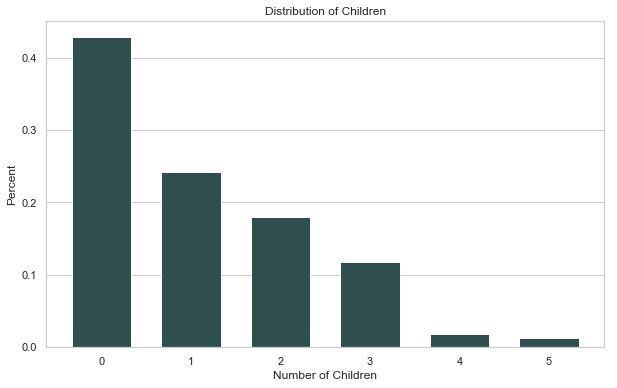

In [14]:
data = insurance.children.value_counts(normalize=True)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2, 3, 4, 5])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Children")
axes.set_xlabel("Number of Children")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

It's not quite dropping by halves but it's close at the start. There are 42% with no children, 24% with 1, 18% with 2, 11% with 3. Then it drops abruptly to 2% with 4 children and 1% with 5. 

<a id="smoker"></a>
## Smoker

Smoker indicates if the person is a smoker. The data is categorical, so we need really only look at the possible values and the distribution:

In [15]:
insurance.smoker.value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

There are only two outcomes, "yes" and "no". This is somewhat interesting as health forms usually distinguish between non-smokers, former smokers (and how long ago they quit), and current smokers. Is this representative of the US as a whole? [Prevalence of Tobacco Consumption](https://en.wikipedia.org/wiki/Prevalence_of_tobacco_consumption) shows that about 15.1% of the US population smoked in 2015. This data seems to contain a higher proportion of smokers than the US population in general.

<a id="region"></a>
## Region

Region is the region of the United States the person lives in. It's not clear what region definitions they're using. This is a categorical variable so we can look at the distribution:

In [16]:
insurance.region.value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

Without knowing the regions, it's difficult to interpret the variable. This is even more difficult because the regions appear to have nearly identical proportions which seems somewhat unlikely.

<a id="charges"></a> 

## Charges

Charges are the main variable of interest and represent health insurance charges by the persons in the database. We would expect for there to be a lot of smaller charges and a few very large bills. The data is probably skewed right and has a Pareto-to-Exponential distribution.

We'll start by looking at the summary statistics:

In [17]:
insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

The variable is definitely skewed. The mean is \$13,270 and the median is \$9,382, or about 30% lower. The 3rd quartile is nearly 4x the 1st quartile. the minimum is "only" \$1,121 while the maximum is \$63,770. Let's plot a histogram of the data using Freeman Diaconis bins: 

In [18]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

Freeman Diaconis:  2164


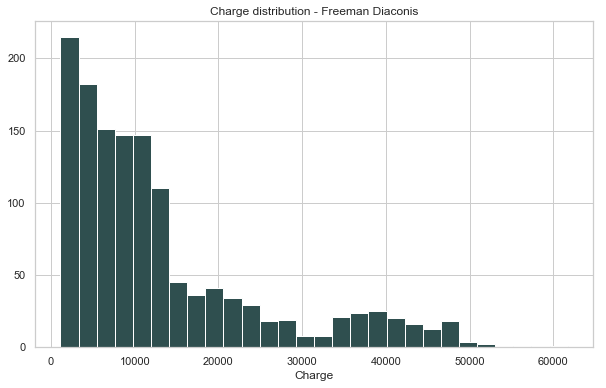

In [19]:
h = freeman_diaconis(insurance.charges)
print("Freeman Diaconis: ", h)
mn = int(insurance.charges.min())
mx = int(insurance.charges.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.charges,bins=bins, color="darkslategray")
axes.set_title("Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")

plt.show()
plt.close()

The distribution doesn't look very regular. There may be a number of factors influencing subgroups of charges that is creating a mixture of distributions. This would explain the mish-mash we see here. The chief question is, do we have that factor?

Additionally, given the shape of the data, we may have to look at charges on the log scale in terms of *magnitudes*.

## Charges v. ?

As we have just seen, the charges data has a very irregular distribution. Generally, such distributions result from a mixture of processes that are creating distinct subgroups or populations in the data. The question is whether we can identify those subgroups using the data we have:

* [age](#v_age)
* [sex](#v_sex)
* [bmi](#v_bmi)
* [children](#v_children)
* [smoker](#v_smoker)
* [region](#v_region)

<a id="v_age"></a>

## Charges v. Age

Age seems like it could be at least one explanatory variable for the different levels of charges. Younger people do not generally have as many health problems whereas older people tend to have more. Let's look first at correlation coefficients even though the relationship may not be linear or monotonic.

In [20]:
print("r   = ", stats.pearsonr( insurance.charges, insurance.age)[0])
print("rho = ", stats.spearmanr( insurance.charges, insurance.age)[0])

r   =  0.29900819333064765
rho =  0.534392133771846


Pearson's correlation coefficient, $r$, is only 0.299 which indicates a fairly weak positive relationship. Spearman's is more interesting at 0.534 which might indicate that at least a medium monotonic relationship. Let's plot the data:

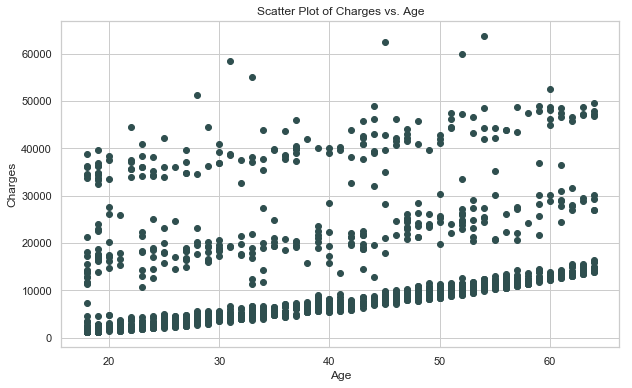

In [21]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.age, insurance.charges, marker="o", color="darkslategray")

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Charges vs. Age")

plt.show()
plt.close()

There appear to be three subgroups of charges that are consistent with every age. A group with lower charges, a group with median charges, and a group with higher charges.

Within each of these groups, higher charges are associated with higher age but the highest of the biggest group (the thicker one at the bottom), only reaches the next band at 65! Basically, we're talking about some factor that can give an 18 year old the medical problems of a 65 year old without that factor.

It's worth flipping this chart on it's side and putting the old histogram above it:

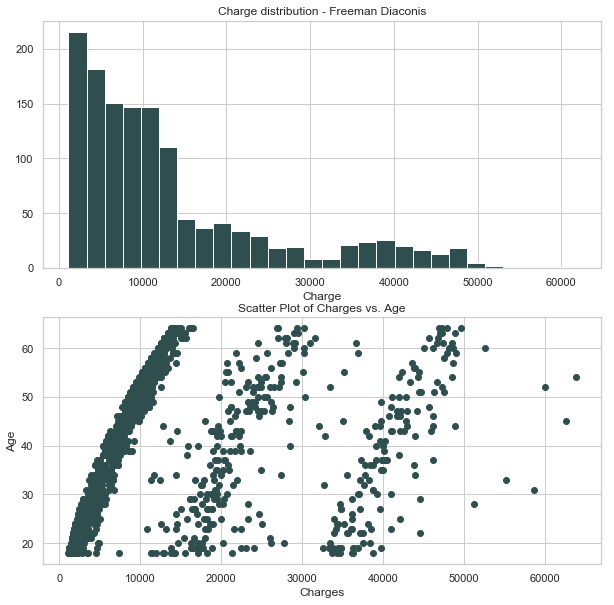

In [22]:
figure = plt.figure(figsize=(10, 10))

axes = figure.add_subplot(2, 1, 1)
axes.hist(insurance.charges,bins=bins,color="darkslategray")
axes.set_title("Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")

axes = figure.add_subplot(2, 1, 2)
axes.scatter( insurance.charges, insurance.age, marker="o", color="darkslategray")

axes.set_ylabel("Age")
axes.set_xlabel("Charges")
axes.set_title("Scatter Plot of Charges vs. Age")

plt.show()
plt.close()

The bottom chart is just using age is a means of spreading out the upper chart like butter across toast. However, as we noticed, there seem to be three main groups here. None of our variables has three values which means we either do not have the variable or it is the intersection of multiple variables with 2 of the possibilities (male, smoker, high BMI; female, non-smoker, lots of children?) creating these two other subgroups.

<a id="v_sex"></a>
## Charges v. Sex

Possibly one of the reasons that women live longer in the US (and many other countries) is that they are more likely to avail themselves of health care services. Perhaps the distribution of charges is explained by sex: women using more health care services than men.

In [23]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [24]:
describe_by_category(insurance, "charges", "sex", transpose=True)

sex          female          male
count    662.000000    676.000000
mean   12569.578844  13956.751178
std    11128.703801  12971.025915
min     1607.510100   1121.873900
25%     4885.158700   4619.134000
50%     9412.962500   9369.615750
75%    14454.691825  18989.590250
max    63770.428010  62592.873090


The summary statistics are inconclusive and we already know what pattern we're looking for. Let's generate side by side histograms of charges by sex:

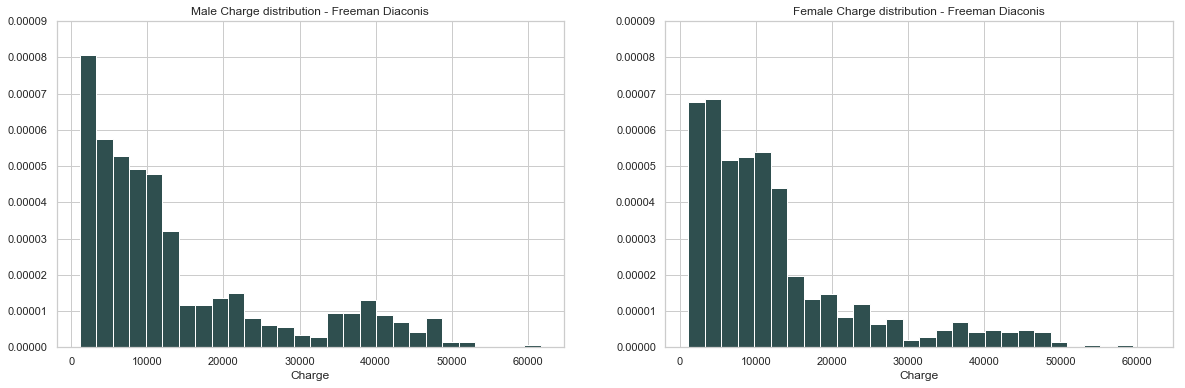

In [25]:
grouped = insurance.groupby("sex")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["charges"].get_group("male"),bins=bins,color="darkslategray",density=True)
axes.set_title("Male Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["charges"].get_group("female"),bins=bins,color="darkslategray",density=True)
axes.set_title("Female Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

plt.show()
plt.close()

Whatever "it" is, men seem to have more of it. Of the 3 bands in earlier charts (lower, middle, high charges), there are more women in the lower band. There maybe more men in the middle band but there are definitely more men in the high band.

<a id="v_bmi"></a>
## Charges v. BMI

We have several other variables that we know are associated with differential health outcomes, BMI and smoking. Let's look at BMI. We'll start with a scatter plot:

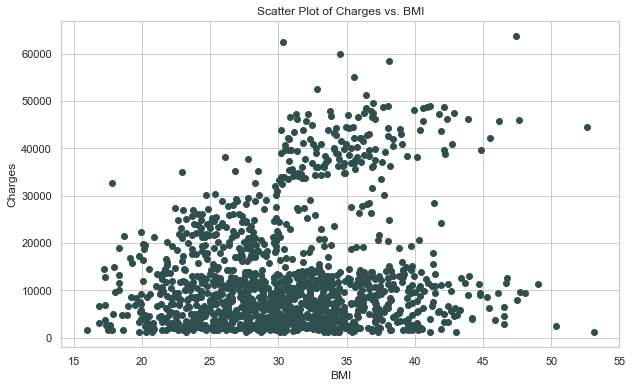

In [26]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.bmi, insurance.charges, marker="o", color="darkslategray")

axes.set_ylabel("Charges")
axes.set_xlabel("BMI")
axes.set_title("Scatter Plot of Charges vs. BMI")

plt.show()
plt.close()

Strangely, there's seems to be a whole range of BMI values across the board that do not lead to different charges and then there is another "world" where increasing BMI values do lead to increasing costs.

Perhaps we need to be looking at the intersection of some of our variables and smoking/sex/BMI seems to be a good candidate.

But first let's look at smoking:

<a id="v_smoker"></a>
## Charges v. Smoker

We would definitely expect to see higher charges for smokers than non-smokers. We'll start with the histogram:

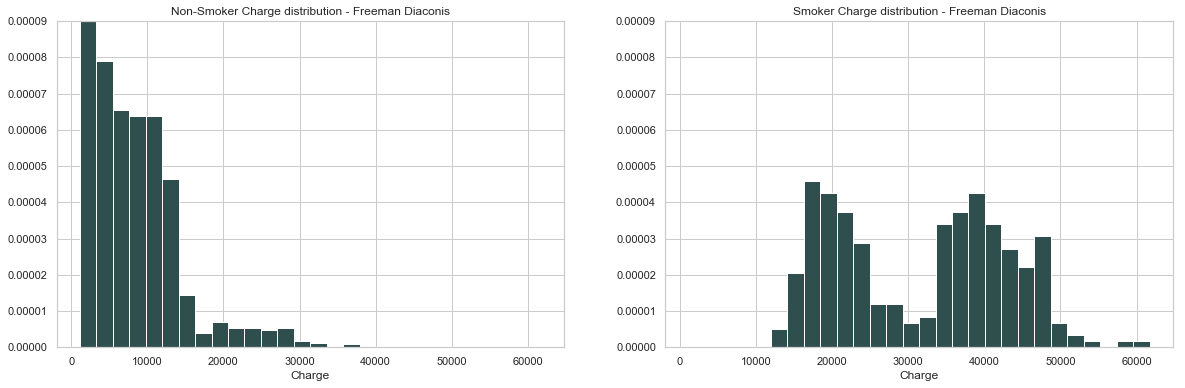

In [27]:
grouped = insurance.groupby("smoker")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["charges"].get_group("no"),bins=bins,color="darkslategray",density=True)
axes.set_title("Non-Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["charges"].get_group("yes"),bins=bins,color="darkslategray",density=True)
axes.set_title("Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

plt.show()
plt.close()

Wow, smoking is definitely one of our factors but it is not the only factor. It is a characteristic shared by the middle band and the upper band. But what factor creates the upper band?

If we scroll back up, we can see that BMI seems to have two different outcomes. Can smoking be the determining factor for those two different outcomes? In such a scenario, we have three groups:

1. non-smoking, lower BMI
2. smoking or higher BMI
3. smoking and higher BMI

We'll use a BMI of 30 to start as the dividing line. Let's create a new variable, "obese", that is binary:

In [28]:
insurance["obese"] = insurance.bmi > 30

And now we can plot it:

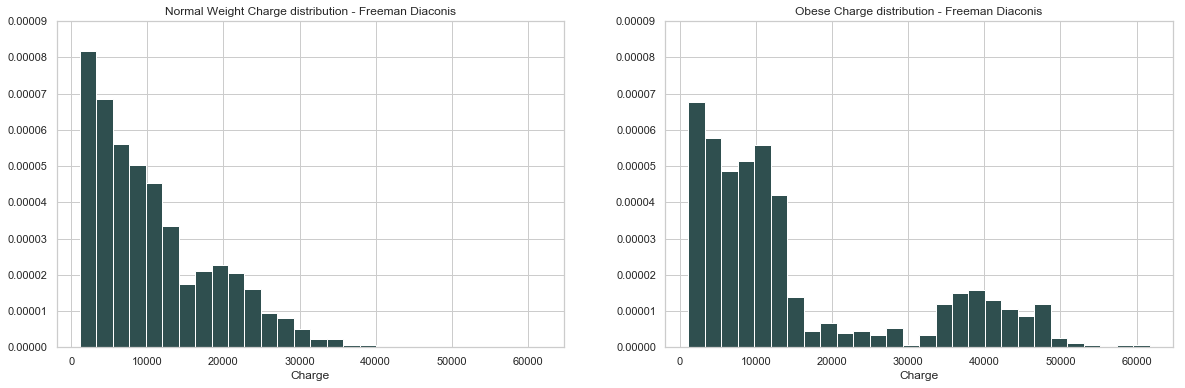

In [29]:
grouped = insurance.groupby("obese")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["charges"].get_group(0),bins=bins,color="darkslategray",density=True)
axes.set_title("Normal Weight Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["charges"].get_group(1),bins=bins,color="darkslategray",density=True)
axes.set_title("Obese Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

plt.show()
plt.close()

As we suspected, the normal weight cohorts are part of the first and middle band. The obese cohort is part of the first and higher band. Let's factor in smoking and create a "lifestyle" variable:

In [30]:
smoker = insurance.smoker == 'yes'
obese = insurance.obese == 1
high = smoker & obese
middle = smoker | obese

insurance["lifestyle"] = np.where(high, "high", np.where(middle , "middle", "low"))

And plot them:

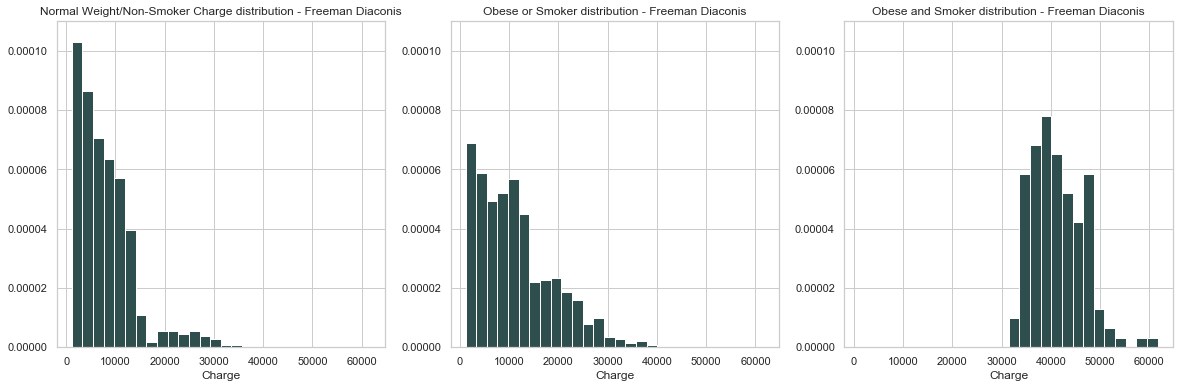

In [31]:
grouped = insurance.groupby("lifestyle")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["charges"].get_group("low"),bins=bins,color="darkslategray",density=True)
axes.set_title("Normal Weight/Non-Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00011))

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["charges"].get_group("middle"),bins=bins,color="darkslategray",density=True)
axes.set_title("Obese or Smoker distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00011))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["charges"].get_group("high"),bins=bins,color="darkslategray",density=True)
axes.set_title("Obese and Smoker distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00011))

plt.show()
plt.close()

We appear to have cleanly split out the lower and the upper bands as normal weight, non-smokers and obese, smokers respectively. The middle band still seems to be a bit muddled. Let's look at the original chart with additional color for our "lifestyle" variable:

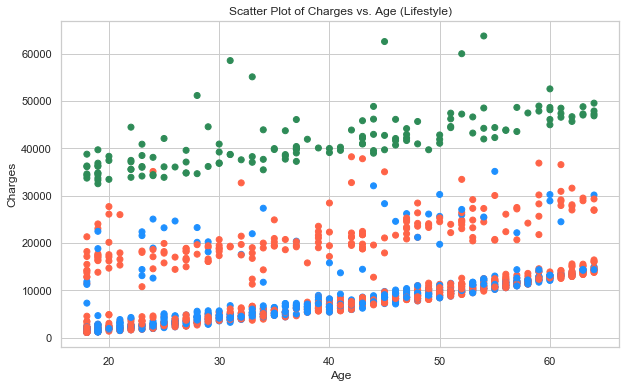

In [34]:
colors = insurance["lifestyle"].apply(lambda x: "DodgerBlue" if x == "low" else ("Tomato" if x == 'middle' else 'Seagreen'))

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.age, insurance.charges, marker="o", color=colors)

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Charges vs. Age (Lifestyle)")

plt.show()
plt.close()

This line of exploration needs a bit more work. There are several avenues of exploration open to us:

1. Explore other variables (children, sex).
2. Refine our "obese" measure.

Additionally, we might need to use more sophisticated modeling techniques.